In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Public economics seminar I- country-by-country reporting
Daniel Kolář

#### Disclaimer:
This is not a data science course, therefore you are not expected to do any active coding. However, you may do so (and be awarded bonus points).

I am using Python, but feel free to use R, Stata, Excel..

Data science courses at IES: *Data Science with R*, *Data Processing in Python*

## Exploratory data analysis

**1. observe one entry of the data**

In [2]:
#load data
data=pd.read_csv("irs_cbcr.csv",index_col="Country")

data.iloc[5:6,]

,No of MNCs,Unrelated party,Related party,Total,Profit (loss) before income tax,Income tax paid,Income tax accrued,Stated capital,Accumulated earnings,Number of employees,Tangible assets other than cash
Country,,,,,,,,,,,
Ghana,26,1402325482,261858743,1664184225,273890215,46682172,15717530,876039514,1455462096,7085,2907451908


**2. observe the distribution of average profits**

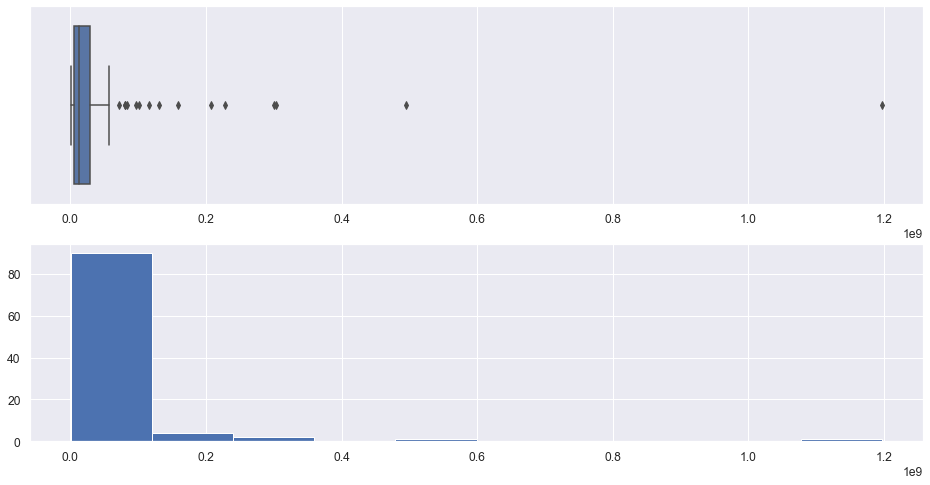

In [19]:
#rename some columns
data=data.rename(columns={"Profit (loss) before income tax": "Profit", "Income tax accrued": "Tax", "No of MNCs":"No",\
                         "Tangible assets other than cash":"Total assets"})
sns.set(font_scale=1.1)

#average profit
avgprofit=data.Profit/data.No
#boxplot and histogram
fig,ax=plt.subplots(2,1,figsize=(16,8))
sns.boxplot(ax=ax[0],x=avgprofit)
ax[1].hist(avgprofit)
plt.show()

In [4]:
#observe the outliers
Q1 = avgprofit.quantile(0.25)
Q3 = avgprofit.quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filt = (avgprofit >= Q1 - 1.5 * IQR) & (avgprofit <= Q3 + 1.5 *IQR)
avgprofit[~filt].sort_values(ascending=False)

Country
United States                                                      1.197877e+09
Stateless entities and other country                               4.946428e+08
Jersey                                                             3.029412e+08
Cayman Islands                                                     2.998520e+08
Bermuda                                                            2.286049e+08
Luxembourg                                                         2.069784e+08
Puerto Rico                                                        1.594430e+08
Switzerland                                                        1.306943e+08
Netherlands                                                        1.158342e+08
United Kingdom (England, Northern Ireland, Scotland, and Wales)    1.009514e+08
Singapore                                                          9.690863e+07
Ireland                                                            8.367102e+07
Europe, other countries         

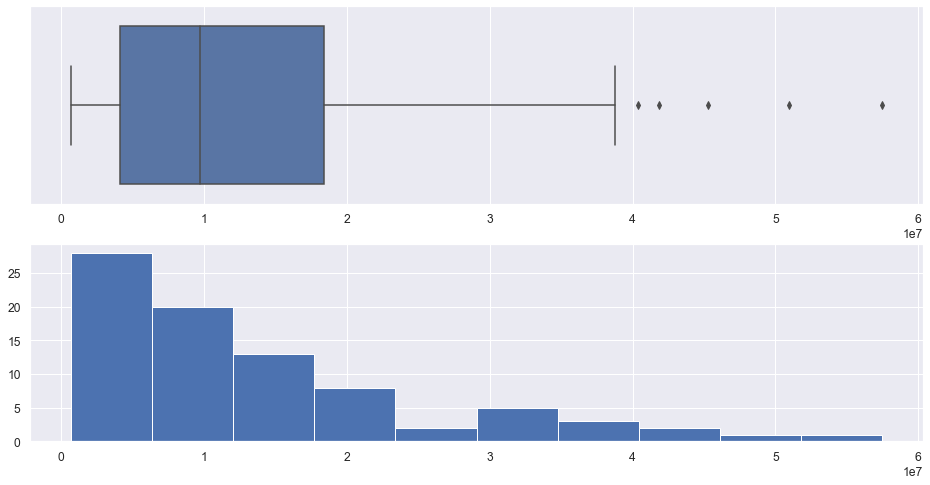

In [20]:
#boxplot and histogram without outliers
avgprofit=data.Profit/data.No
fig,ax=plt.subplots(2,1,figsize=(16,8))
sns.boxplot(ax=ax[0],x=avgprofit[filt])
ax[1].hist(avgprofit[filt])
plt.show()

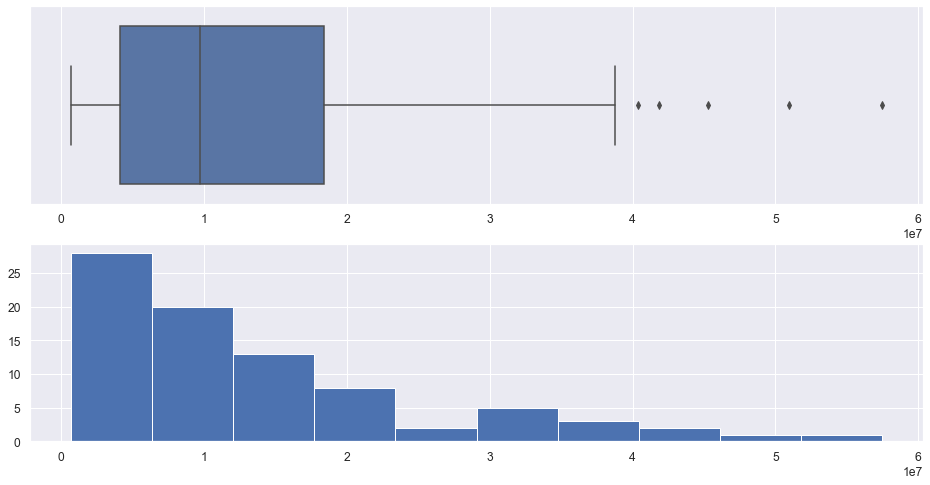

In [21]:
#boxplot and histogram without outliers
avgprofit=data.Profit/data.No
fig,ax=plt.subplots(2,1,figsize=(16,8))
sns.boxplot(ax=ax[0],x=avgprofit[filt])
ax[1].hist(avgprofit[filt])
plt.show()

**3. observe correlations**

a) without outliers

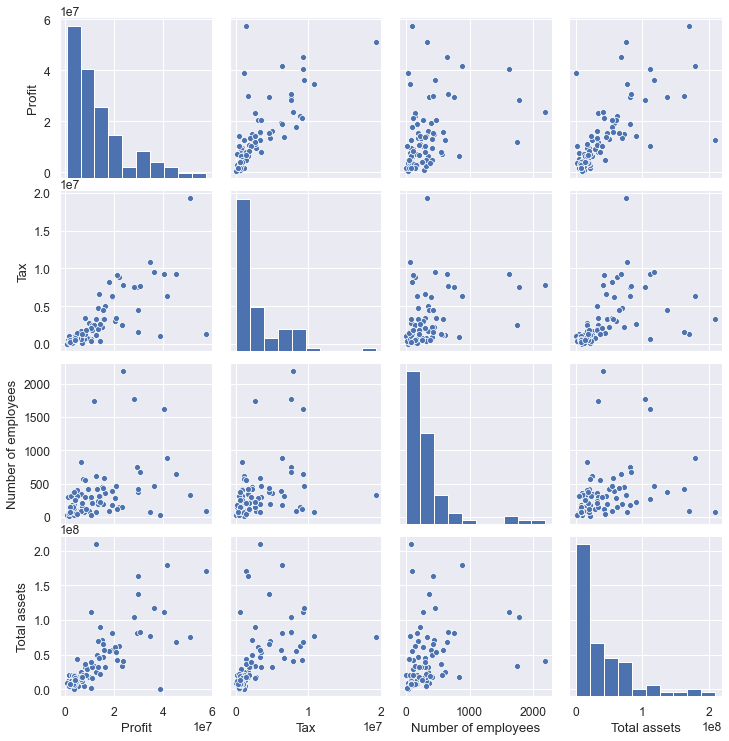

In [6]:
#select variables for which we observe correlation
data2=data.loc[:,["Profit","Tax","Number of employees","Total assets"]]

#divide each row by number of firms
data2=data2.div(data.No, axis=0)

#correlations without outliers
sns.pairplot(data2[filt])

b) outliers only (without the US)

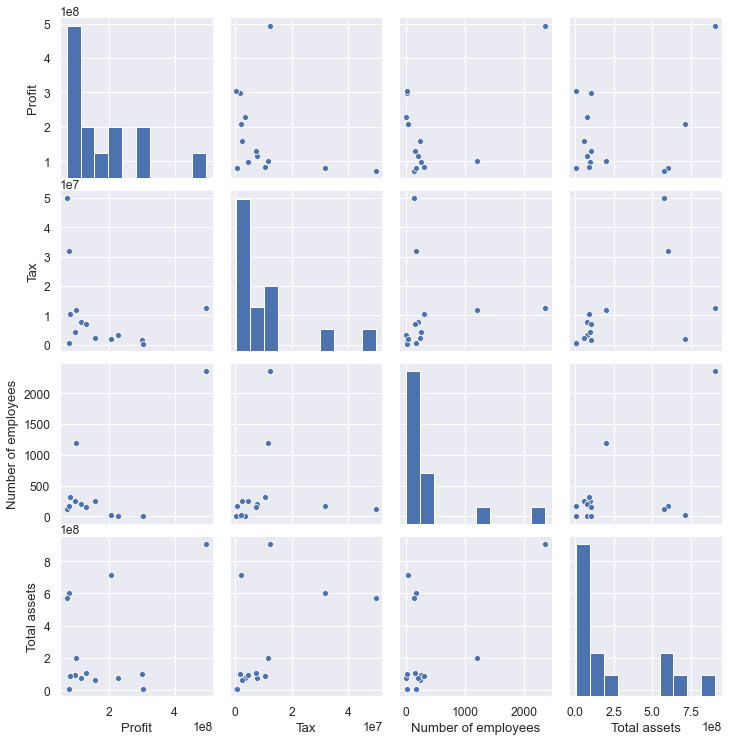

In [15]:
#select variables for which we observe correlation
data2=data.loc[:,["Profit","Tax","Number of employees","Total assets"]]

#divide each row by number of firms
data2=data2.div(data.No, axis=0)

#correlations without outliers
sns.pairplot(data2[~filt][data2[~filt].index!="United States"])